<a href="https://colab.research.google.com/github/Desmyk/MACHINELEARNING/blob/main/Credit_Risk_model_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# General Libraries

import warnings
warnings.filterwarnings('ignore')

# Data Exploration libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Visualization
import seaborn as sns #Advanced Visualization
%matplotlib inline

# Data modelling libraries
from sklearn.impute import SimpleImputer
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score

In [4]:
#Loading data
Loan = pd.read_csv("https://raw.githubusercontent.com/zinduaschool/0305-credit-risk-modelling---classification-Desmyk/main/raw-data.csv?token=GHSAT0AAAAAACTDZ3MOFNIVVGB45YEHV2OIZT72ZVA")
Loan.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


In [5]:
#Renaming columns in the dataset with their correct names
Loan_renamed = Loan.rename(columns={'V1': 'Customer ID',
'V2': 'Customer has bounced in first EMI',
'V3': 'No of times bounced 12 months',
'V4': 'Maximum MOB',
'V5': 'No of times bounced while repaying the loan',
'V6': 'EMI',
'V7': 'Loan Amount',
'V8': 'Tenure',
'V9': 'Dealer codes from where customer has purchased the Two wheeler',
'V10': 'Product code of Two wheeler',
'V11': 'No of advance EMI paid',
'V12': 'Rate of interest',
'V13': 'Gender',
'V14': 'Employment type',
'V15': 'Resident type of customer',
'V16': 'Date of birth',
'V17': 'Customer age when loanwas taken',
'V18': 'No of loans',
'V19': 'No of secured loans',
'V20': 'No of unsecured loans',
'V21': 'Max amount sanctioned in the Live loans',
'V22': 'No of new loans in last 3 months',
'V23': 'Total sanctioned amount in the secured Loans which are Live',
'V24': 'Total sanctioned amount in the unsecured Loans which are Live',
'V25': 'Maximum amount sanctioned for any Two wheeler loan',
'V26': 'Time since last Personal loan taken (in months)',
'V27': 'Time since first consumer durables loan taken (in months)',
'V28': 'No of times 30 days past due in last 6 months',
'V29': 'No of times 60 days past due in last 6 months',
'V30': 'No of times 90 days past due in last 3 months',
'V31': 'Tier',
'V32': 'Target variable'})
Loan_renamed.head(2)

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,...,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0


In [6]:
# Basic EDA and Data Cleaning
Loan_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 32 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   Customer ID                                                     119528 non-null  int64  
 1   Customer has bounced in first EMI                               119528 non-null  int64  
 2   No of times bounced 12 months                                   119528 non-null  int64  
 3   Maximum MOB                                                     85048 non-null   float64
 4   No of times bounced while repaying the loan                     85048 non-null   float64
 5   EMI                                                             85048 non-null   float64
 6   Loan Amount                                                     85048 non-null   float64
 7   Tenure                                

In [7]:
#Removing irrelevant columns
irrelevant_columns = ['Time since first consumer durables loan taken (in months)','Time since last Personal loan taken (in months)']
Loan_renamed.drop(['Time since first consumer durables loan taken (in months)','Time since last Personal loan taken (in months)'], axis = 1, inplace = True)
Loan_renamed.shape

(119528, 30)

In [8]:
# Missing values treatment
Loan_renamed.dropna(axis=0,how='any',subset=['Loan Amount','Gender'],inplace=True)

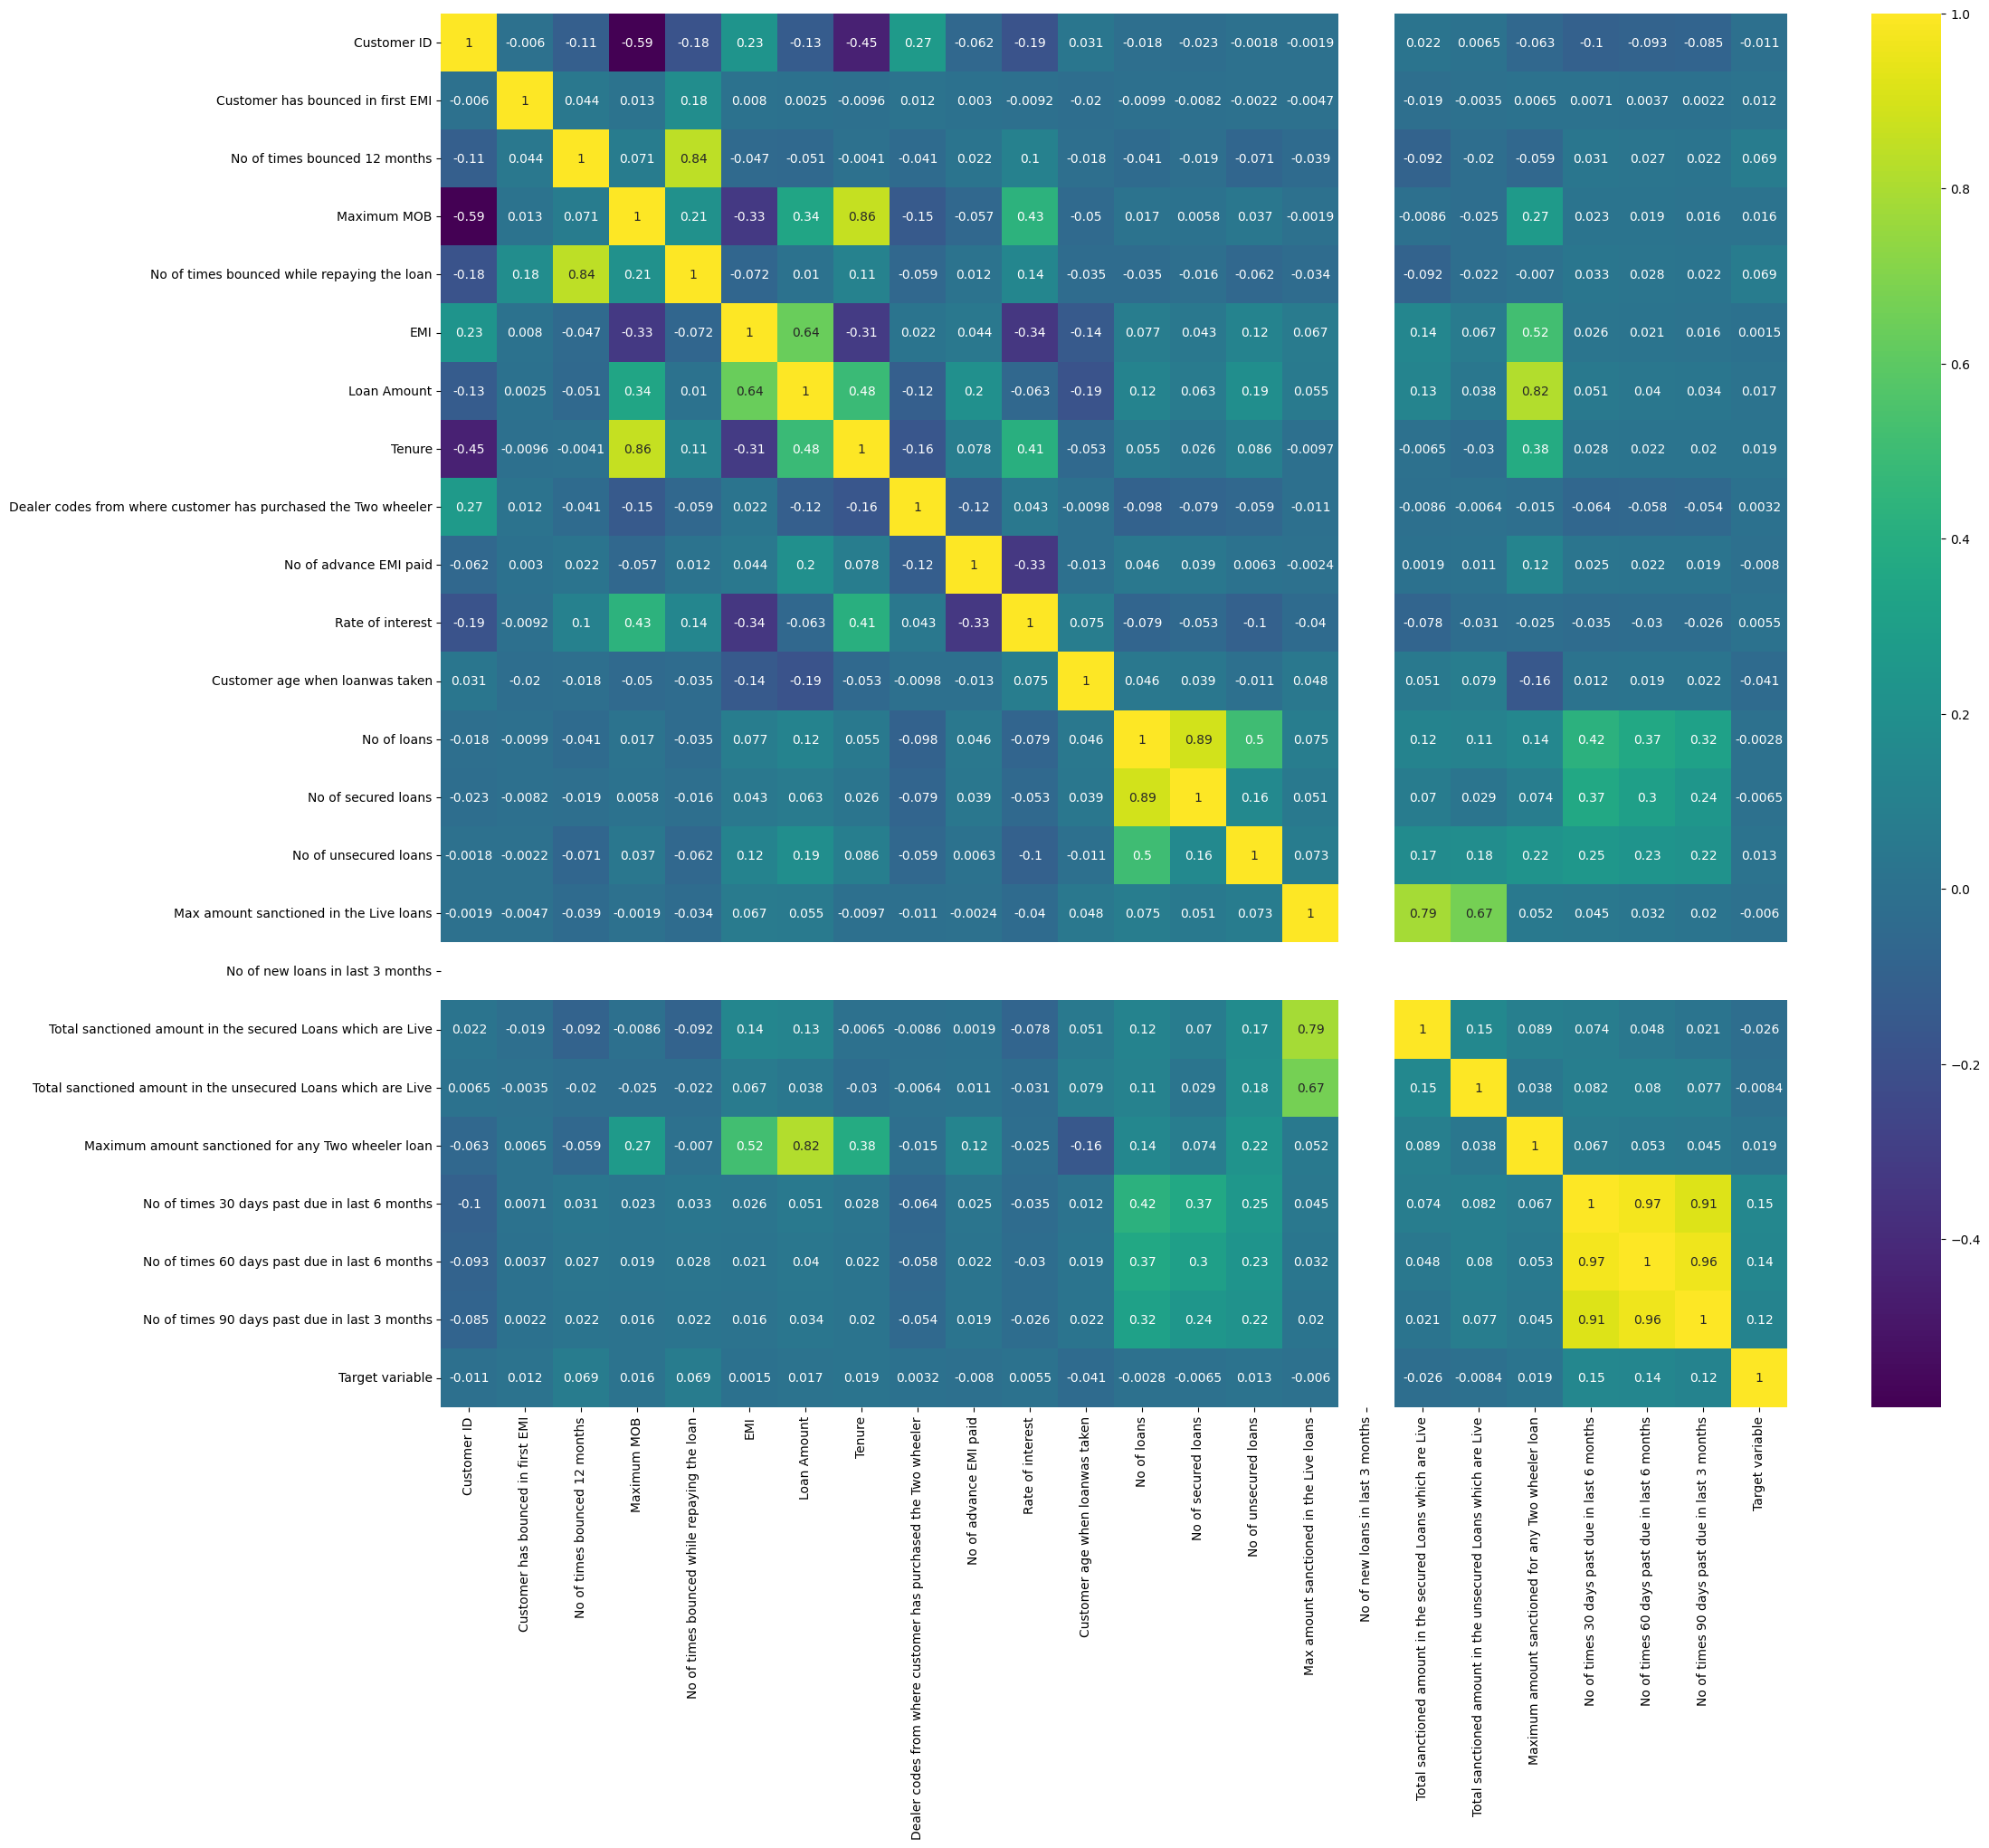

In [9]:
#correlation matrix
corrmat = Loan_renamed.select_dtypes(include=['float64', 'int64']).corr() # Select only numerical columns
top_corr_features = corrmat.index
plt.figure(figsize=(24,20))
g=sns.heatmap(Loan_renamed[top_corr_features].corr(),annot=True,cmap="viridis")

Target variable
0    83194
1     1854
Name: count, dtype: int64


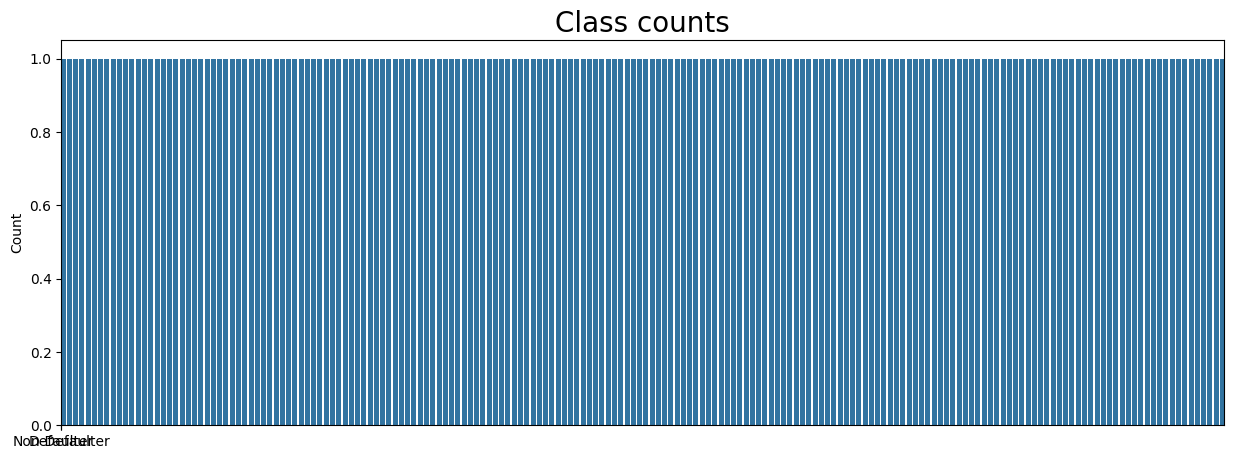

In [10]:
# Getting the number of positive and negative examples.
plt.figure(figsize=(15,5))
sns.countplot(Loan_renamed['Target variable'])
plt.xticks((0, 1), ["Non-Defaulter", "Defaulter"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20})

print(Loan_renamed['Target variable'].value_counts())

<Axes: title={'center': 'Loan Amount (Box Plot)'}, xlabel='Employment type', ylabel='Loan Amount'>

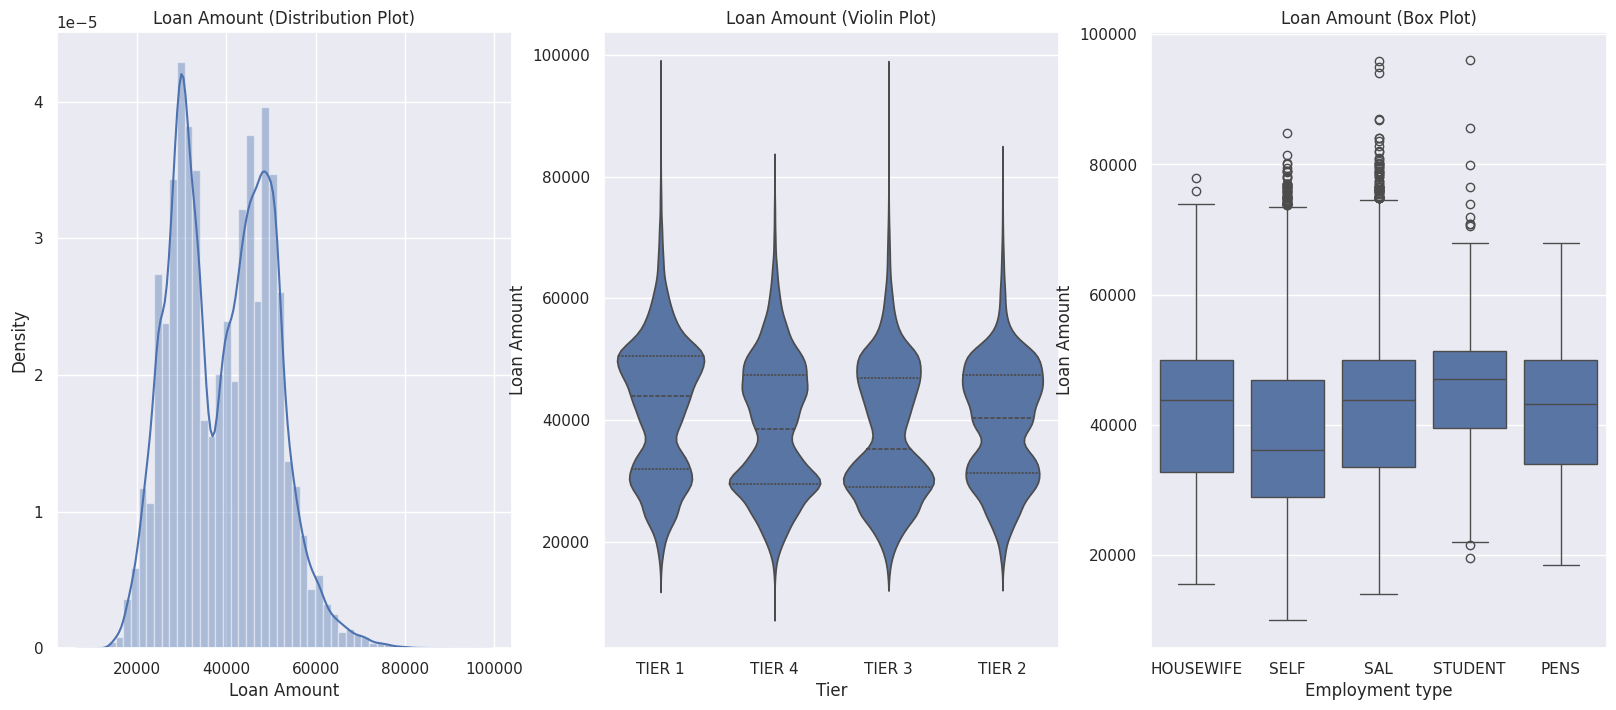

In [11]:
sns.set(style="darkgrid")

fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
ax[0].set_title("Loan Amount (Distribution Plot)")
sns.distplot(Loan_renamed['Loan Amount'],ax=ax[0])
ax[1].set_title("Loan Amount (Violin Plot)")
sns.violinplot(data =Loan_renamed, x='Tier',y='Loan Amount',ax=ax[1], inner="quartile")
ax[2].set_title("Loan Amount (Box Plot)")
sns.boxplot(data =Loan_renamed, x='Employment type',y='Loan Amount',ax=ax[2],orient='v')

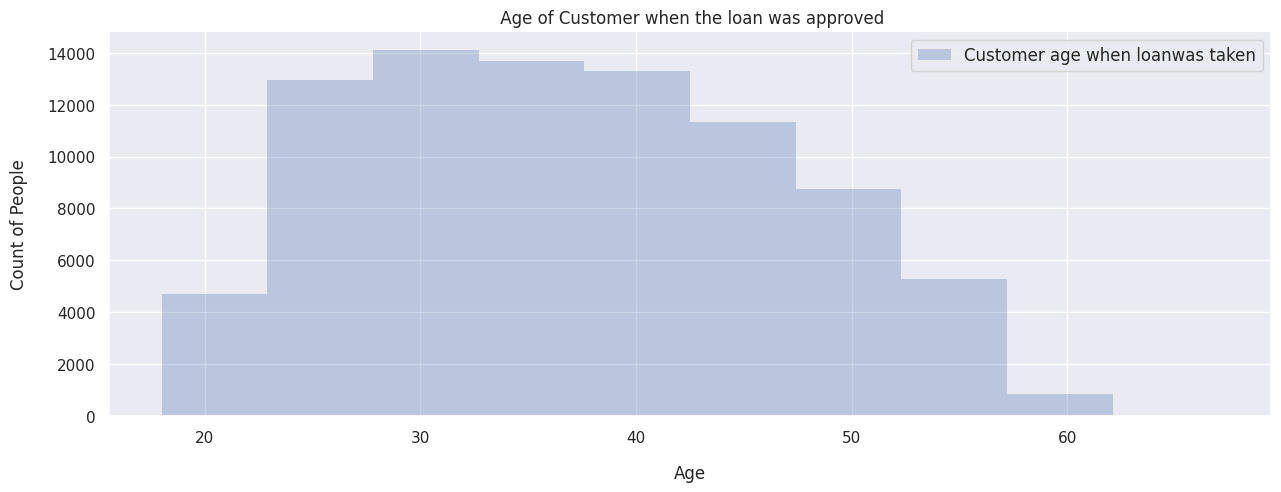

In [12]:
##Age- age at which the client took the loan
plt.figure(figsize=(15,5))

#bar plot
Loan_renamed['Customer age when loanwas taken'].plot(kind='hist',color='b',alpha=0.3, edgecolor='none')
plt.xlabel("Age", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title(" Age of Customer when the loan was approved")
plt.legend(loc="best",prop={"size":12})

<Axes: xlabel='Customer age when loanwas taken', ylabel='Loan Amount'>

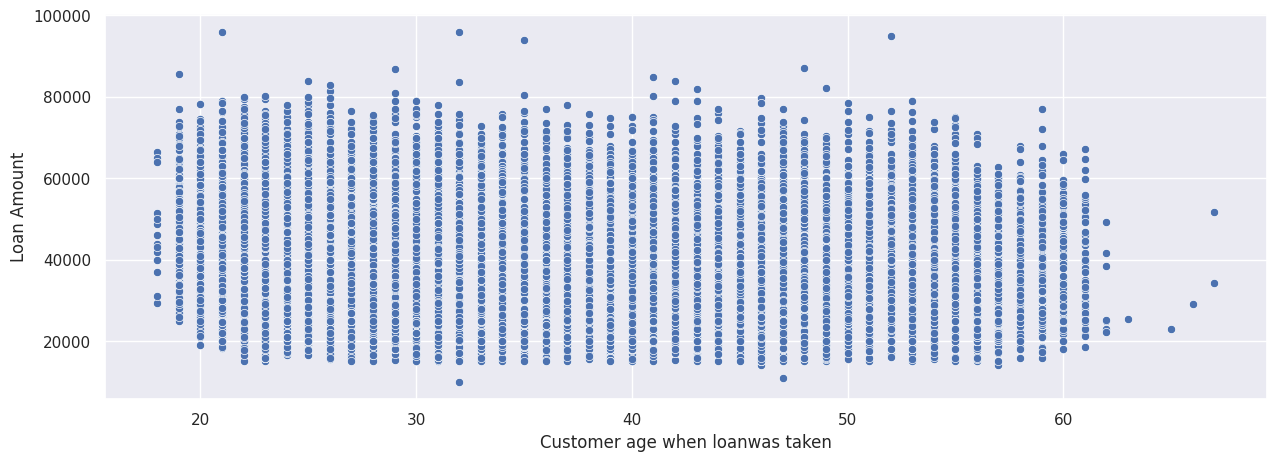

In [13]:
# Explore correlation between age and loan amount
plt.figure(figsize=(15,5))
sns.scatterplot(x=Loan_renamed['Customer age when loanwas taken'],y='Loan Amount',data=Loan_renamed)

In [20]:
# gender = pd.get_dummies(Loan_renamed['Gender'])
# Loan_renamed=pd.concat([Loan_renamed,gender], axis=1)
# Loan_renamed = Loan_renamed.drop('Gender', axis=1)

In [ ]:
dropped=['Time since first consumer durables loan taken (in months)','Time since last Personal loan taken (in months)',
'Max amount sanctioned in the Live loans','Total sanctioned amount in the secured Loans which are Live',
'Total sanctioned amount in the unsecured Loans which are Live','Maximum amount sanctioned for any Two wheeler loan']

Loan_renamed.drop(dropped,axis=1,inplace=True)

In [15]:
# DATA CLEANING
data=Loan_renamed.copy()

In [16]:
# Imputing missing values
# To do, investigate them first and document the case for imputation, we might need to drop them.

CatVariables = data.select_dtypes(include=['object'])
NumVariables = data.select_dtypes(include=['float','int'])

#standardizing column names for easier usage
data.columns=data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
CatVariables=CatVariables.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
NumVariables=NumVariables.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [17]:
#For quantitative data

numerical_cols = data[NumVariables]
categorical_cols = data[CatVariables]

# imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
# lat = imp_mean.fit_transform(numerical_cols)
# imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
# g_se = imp_mode.fit_transform(categorical_cols)

In [ ]:
data[CatVariables]=g_se
data[NumVariables]=lat

In [18]:
# Encoding

# Dealing with categorical columns
# Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in CatVariables:
    data[feature] = le.fit_transform(data[feature].astype(str))

In [19]:
# Class IMbalance
X=data.drop(['customer_id','target_variable'],axis=1)
y=data[["target_variable"]]

In [20]:
#For quantitative data

numerical_cols = data[NumVariables]
categorical_cols = data[CatVariables]

imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
data[NumVariables] = imp_mean.fit_transform(numerical_cols) # Impute and assign back to original dataframe

imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
data[CatVariables] = imp_mode.fit_transform(categorical_cols) # Impute and assign back to original dataframe

# ... (Rest of your code)

# Class IMbalance
X=data.drop(['customer_id','target_variable'],axis=1)
y=data[["target_variable"]]

# ... (Rest of your code for SMOTE)

array([[<Axes: title={'center': 'target_variable'}>]], dtype=object)

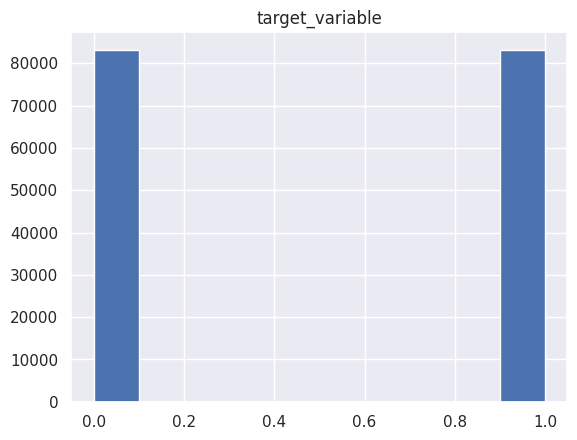

In [21]:
smote_sample=SMOTE(random_state=124,sampling_strategy='auto') # the sampling strategy can be one of float, str, dict or callable `float``,
#it corresponds to the desired ratio of the number of samples in the minority class over the number of samples in the majority class after resampling ie {1:500}
# ``'minority'``: resample only  minority class; 'not minority'``:all but the minority class; ``'not majority'``: all but the majority, ``'all'`` ,``'auto'``:
x_res, y_res=smote_sample.fit_resample(X,y)


# now plot the classes
y_res.hist()

In [22]:
print(x_res.shape,y_res.shape)

(166388, 28) (166388, 1)


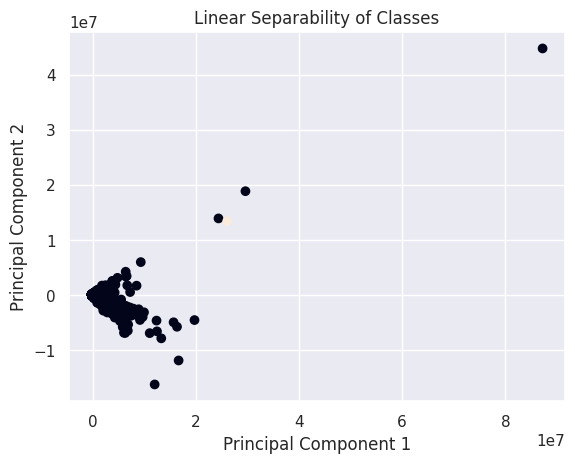

In [23]:
# Linear Separability
# To explore the linear separability of the two classes,
# I'll use a scatter plot to visualize the data. Since we have multiple features,
# I'll use PCA to reduce the dimensionality to 2D.

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Iterate through columns and encode any object (string) types
for col in Loan_renamed.columns:
    if Loan_renamed[col].dtype == 'object':
        le = LabelEncoder()
        Loan_renamed[col] = le.fit_transform(Loan_renamed[col])

# Impute NaNs in the entire DataFrame before applying PCA
imputer = SimpleImputer(strategy='median')
Loan_renamed_imputed = pd.DataFrame(imputer.fit_transform(Loan_renamed))
Loan_renamed_imputed.columns = Loan_renamed.columns  #(Restore column names)

# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Loan_renamed_imputed.drop(['Target variable'], axis=1))

# Plot the data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Loan_renamed_imputed['Target variable'])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Linear Separability of Classes")
plt.show()

In [24]:
# Multicollinearity
# To assess the effect of multicollinearity on model performance,
# I'll calculate the variance inflation factor (VIF) for each feature.

from statsmodels.stats.outliers_influence import variance_inflation_factor

df = Loan_renamed.copy()
# (Create a copy to avoid modifying the original)

# Handle missing values (NaNs)
# You can choose a strategy like 'median', 'mean', or 'most_frequent'
df = df.fillna(df.median())

# Handle infinite values (inf)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(df.median())

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df.drop(['Target variable'], axis=1).values, i) for i in range(df.drop(['Target variable'], axis=1).shape[1])]
vif['features'] = df.drop(['Target variable'], axis=1).columns
print(vif.sort_values('VIF', ascending=False))

           VIF                                           features
7   153.507622                                             Tenure
6   152.938480                                        Loan Amount
5    98.546295                                                EMI
3    68.713362                                        Maximum MOB
26   43.569582      No of times 60 days past due in last 6 months
24   32.423017  Maximum amount sanctioned for any Two wheeler ...
25   22.499066      No of times 30 days past due in last 6 months
13   21.215221                                    Employment type
17   20.457551                                        No of loans
11   16.222431                                   Rate of interest
16   15.365473                    Customer age when loanwas taken
27   15.136412      No of times 90 days past due in last 3 months
18   14.394384                                No of secured loans
14    9.726758                          Resident type of customer
12    8.55

In [27]:
# diferent classification models to understand the best model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC()
]

# Train and evaluate each model
for model in models:
    X_train, X_test, y_train, y_test = train_test_split(df.drop(['Target variable'], axis=1), df['Target variable'], test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print()

Model: LogisticRegression
Accuracy: 0.978
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     16643
           1       0.00      0.00      0.00       367

    accuracy                           0.98     17010
   macro avg       0.49      0.50      0.49     17010
weighted avg       0.96      0.98      0.97     17010

Confusion Matrix:
[[16643     0]
 [  367     0]]

Model: DecisionTreeClassifier
Accuracy: 0.957
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     16643
           1       0.11      0.15      0.13       367

    accuracy                           0.96     17010
   macro avg       0.55      0.56      0.55     17010
weighted avg       0.96      0.96      0.96     17010

Confusion Matrix:
[[16225   418]
 [  313    54]]

Model: RandomForestClassifier
Accuracy: 0.979
Classification Report:
              precision    recall  f1-score

In [31]:
# To optimize the model, I'll perform hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(df.drop(['Target variable'], axis=1), df['Target variable'])

# Print the best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.3f}")

# Refit the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(df.drop(['Target variable'], axis=1), df['Target variable'])

# Evaluate the best model
y_pred = best_model.predict(df.drop(['Target variable'], axis=1))
print(f"Accuracy: {accuracy_score(df['Target variable'], y_pred):.3f}")
print(f"Classification Report:")
print(classification_report(df['Target variable'], y_pred))
print(f"Confusion Matrix:")
print(confusion_matrix(df['Target variable'], y_pred))

Best Parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.912
Accuracy: 0.978
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     83194
           1       0.00      0.00      0.00      1854

    accuracy                           0.98     85048
   macro avg       0.49      0.50      0.49     85048
weighted avg       0.96      0.98      0.97     85048

Confusion Matrix:
[[83194     0]
 [ 1854     0]]


In [32]:
# Tuning the model
model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5)
model.fit(df.drop(['Target variable'], axis=1), df['Target variable'])

# Evaluate the tuned model
y_pred = model.predict(df.drop(['Target variable'], axis=1))
print(f"Accuracy: {accuracy_score(df['Target variable'], y_pred):.3f}")
print(f"Classification Report:")
print(classification_report(df['Target variable'], y_pred))
print(f"Confusion Matrix:")
print(confusion_matrix(df['Target variable'], y_pred))

Accuracy: 0.979
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     83194
           1       1.00      0.02      0.04      1854

    accuracy                           0.98     85048
   macro avg       0.99      0.51      0.51     85048
weighted avg       0.98      0.98      0.97     85048

Confusion Matrix:
[[83194     0]
 [ 1817    37]]
